# Homework - perform multiple linear regression on the
`FuelConsumption.csv data`
* use follwing features: `['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB'`
* make a two 2D plot of ENGINESIZE vs CO2EMISSIONS and CYLINDERS vs CO2EMISSIONS
* make a 3D plot of ENGINESIZE and CYLINDERS vs CO2EMISSIONS
* apply feature scaling (be able to swith it off and on) (commented or not commented)
* split the data into X_train/y_train and X_test/y_test (80%-20%)
  using `from sklearn.model_selection import train_test_split`
* train the model using X_train data
* evaluate the fit (R-Squared)
* print the metrics MAE, MAPE
* predict CO2 emission of the 10 randomly chosen cars, compare with the true values
* compare results with the simple single feature regression
* write short comments on each step

# Load python libraries

In [1]:
%pylab inline
import pandas as pd
from mpl_toolkits import mplot3d
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model

Populating the interactive namespace from numpy and matplotlib


<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUELTYPE** e.g. z
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Reading the data into Pandas</h2>

In [2]:
#Read the data from file.
df=pd.read_csv("FuelConsumption.csv",sep=",")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Let's select some features that we want to use for regression.


In [3]:
#Get the features to be analyzed.
data=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


Let's plot Emission values with respect to Engine size:


<h2 id="reading_data">Visualize the data in 2D</h2>

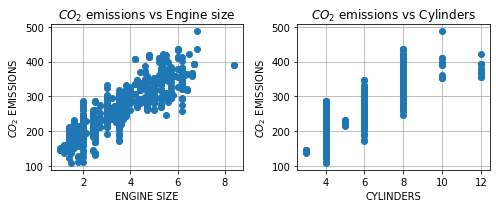

In [4]:
X=data[['ENGINESIZE','CYLINDERS']]
y=data['CO2EMISSIONS']

fig,ax=subplots(1,2,figsize=(7,3))
ax[0].plot(X.to_numpy().T[0],y.to_numpy(),'o')
ax[0].set_xlabel("ENGINE SIZE")
ax[0].set_ylabel("$CO_2$ EMISSIONS")
ax[0].set_title("$CO_2$ emissions vs Engine size")
ax[0].grid()

ax[1].plot(X.to_numpy().T[1],y.to_numpy(),'o')
ax[1].set_xlabel("CYLINDERS")
ax[1].set_ylabel("$CO_2$ EMISSIONS")
ax[1].set_title("$CO_2$ emissions vs Cylinders")
ax[1].grid()
fig.tight_layout()

By means of the graphic of the data we can see that the dependence of $CO_2$ emissions with engine size and number of cylinders is linear. 

<h2 id="reading_data">Visualize the data in 3D</h2>

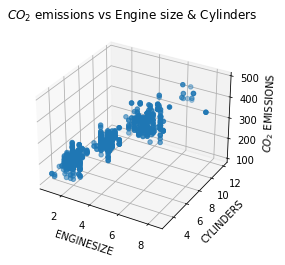

In [5]:
fig2 = plt.figure(figsize=(6,4))
ax2 = plt.axes(projection ='3d')
 
xd = X['ENGINESIZE']
yd = X['CYLINDERS']
zd = y
ax2.scatter(xd, yd, zd) # must be floats
#ax2.plot3D(x, y, z, 'green')

ax2.set_xlabel('ENGINESIZE')
ax2.set_ylabel('CYLINDERS')
ax2.set_zlabel('$CO_2$ EMISSIONS') 
ax2.set_title('$CO_2$ emissions vs Engine size & Cylinders')
plt.show()

With this plot we see that a multiple linear regression of the data is suitable.

# Normalize the data by feature-scaling
* try to make in a way that you can turn it on and off
* if you comment the feature scaling the program should still work

In [6]:
X_data=X
y_data=y

In [7]:
#Uncomment this block to enable the scaling feature option.
"""
#Change this variable to True, in order to turned on the scaling.
scaling=False

nX_data = preprocessing.StandardScaler(with_mean=scaling,with_std=scaling).fit(X_data).transform(X_data)
ny_data = preprocessing.StandardScaler(with_mean=scaling,with_std=scaling).fit(y_data.values.reshape(-1, 1)).transform(y_data.values.reshape(-1, 1))
X_data=nX_data
y_data=ny_data
"""

'\n#Change this variable to True, in order to turned on the scaling.\nscaling=False\n\nnX_data = preprocessing.StandardScaler(with_mean=scaling,with_std=scaling).fit(X_data).transform(X_data)\nny_data = preprocessing.StandardScaler(with_mean=scaling,with_std=scaling).fit(y_data.values.reshape(-1, 1)).transform(y_data.values.reshape(-1, 1))\nX_data=nX_data\ny_data=ny_data\n'

# Split the data into train and test using scikit-learn

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

In [8]:
#X_train, X_test, y_train, y_test = train_test_split( nX_data, ny_data, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.2)

<h2 id="multiple_regression_model">Train the model using X_train and y_train sets using scikit-learn</h2>


In [9]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [27.83946939  9.37432429]
Intercept:  109.09401782015738


As mentioned before, **Coefficient** and **Intercept**  are the parameters of the fitted line.
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

*   Solving the model parameters analytically using closed-form equations
*   Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)


<h2 id="prediction">Evaluate R2</h2>

In [10]:
R2=regr.score(X_test, y_test) # R-Squared (how good is the fit)
print('R2=',R2)

R2= 0.7499105273569693


<h2 id="prediction">Prediction C02 emission from ten random cars</h2>

In [11]:
samples=np.random.randint(0,X_test.shape[0],10)

try:
    preds = regr.predict(X_test.to_numpy()[samples])
    print("{:>16} | {:>11}".format("Predicted values","Real values"))
    for i in range(len(preds)):
        print("{:>10f} {:>18f}".format(preds[i],y_test.to_numpy()[i]))
except:
    preds = regr.predict(X_test[samples])
    print("{:>16} | {:>11}".format("Predicted values","Real values"))
    for i in range(len(preds)):
        print("{:>10f} {:>18f}".format(preds[i][0],y_test[i][0]))

Predicted values | Real values
191.134466         310.000000
331.637800         344.000000
323.285959         269.000000
259.994160         186.000000
262.778106         222.000000
191.134466         292.000000
202.270254         237.000000
314.934118         225.000000
248.858372         362.000000
191.134466         239.000000


<h2 id="prediction">Print the metrics</h2>

* MAE    
* MAPE    
* R-squared    

In [12]:
all_preds = regr.predict(X_test)

print("Mean absolute error: {:>20f}".format(np.mean(np.absolute(all_preds- y_test))))
print("Residual sum of squares (MSE): {:>11f}".format(np.mean((all_preds - y_test) ** 2)))
print("R2-score: {:>30f}".format(regr.score(X_test, y_test)))

Mean absolute error:            24.295042
Residual sum of squares (MSE):  977.885837
R2-score:                       0.749911


In [13]:
# Doesn't compile: 
# error: 'Series' object has no attribute 'reshape'